# Case Study: Stock Charts

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('precision', 3)
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 15)

References:
https://python-programming.quantecon.org/index_toc.html
https://python.quantecon.org/index_tools_and_techniques.html

In [5]:
from pandas_datareader import data

In [8]:
# ?data.DataReader

In [9]:
# Retrive Data

In [10]:
start = datetime.datetime(2019, 1, 1)
end = datetime.date.today()
nvda = data.DataReader("NVDA", "yahoo", start, end)

In [11]:
type(nvda)

pandas.core.frame.DataFrame

In [12]:
# save data to a csv file

In [13]:
nvda.to_csv("nvda.csv")

In [14]:
# Retrive data from the csv file

In [15]:
nvda = pd.read_csv("nvda.csv", index_col=0, parse_dates=True)

In [16]:
nvda

              High     Low    Open   Close     Volume  Adj Close
Date                                                            
2019-01-02  138.48  130.05  130.64  136.22  1.272e+07    135.507
2019-01-03  135.16  127.69  133.79  127.99  1.764e+07    127.320
2019-01-04  137.73  129.70  130.94  136.19  1.464e+07    135.477
2019-01-07  144.89  136.43  138.50  143.40  1.773e+07    142.649
...            ...     ...     ...     ...        ...        ...
2020-09-02  589.07  556.00  588.15  573.86  2.185e+07    573.860
2020-09-03  555.38  515.15  553.15  520.62  2.363e+07    520.620
2020-09-04  527.00  468.19  511.35  504.90  3.659e+07    504.900
2020-09-08  502.00  468.17  469.38  476.52  1.985e+07    476.520

[425 rows x 6 columns]

In [17]:
# plot the data

### OHLC chart

An OHLC chart is a type of bar chart that shows open, high, low, and closing prices for each period. OHLC charts are useful since they show the four major data points over a period, with the closing price being considered the most important by many traders.

https://www.investopedia.com/terms/o/ohlcchart.asp

### Adjusted Closing Price

The closing price is simply the cash value of that specific piece of stock at day's end while the adjusted closing price reflects the closing price of the stock in relation to other stock attributes. In general, the adjusted closing price is considered to be a more technically accurate reflection of the true value of the stock.

https://www.investopedia.com/terms/a/adjusted_closing_price.asp
https://finance.zacks.com/adjusted-closing-price-vs-closing-price-9991.html

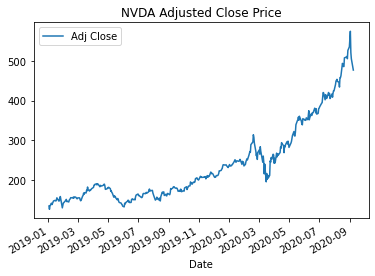

In [18]:
nvda[['Adj Close']].plot(title="NVDA Adjusted Close Price")

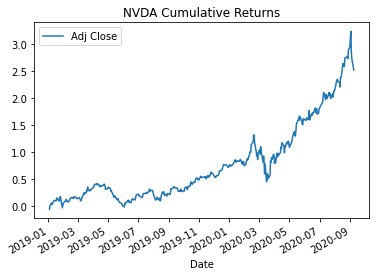

In [19]:
# Convert the adjusted closing prices to cumulative returns.
returns = nvda[['Adj Close']].pct_change()
cumulative_returns = (returns + 1.).cumprod() - 1.0
cumulative_returns.plot(title='NVDA Cumulative Returns')

## Concatenation

### Concatenate with rows

In [20]:
nvda2019 = data.DataReader("NVDA", "yahoo", datetime.date(2019, 1, 1), datetime.date(2019, 12, 31))
nvda2020 = data.DataReader("NVDA", "yahoo", datetime.date(2020, 1, 1), datetime.date.today())

In [21]:
nvda2019_2020 = pd.concat([nvda2019, nvda2020], axis=0)

In [22]:
nvda2019

              High     Low    Open   Close     Volume  Adj Close
Date                                                            
2019-01-02  138.48  130.05  130.64  136.22  1.272e+07    135.507
2019-01-03  135.16  127.69  133.79  127.99  1.764e+07    127.320
2019-01-04  137.73  129.70  130.94  136.19  1.464e+07    135.477
2019-01-07  144.89  136.43  138.50  143.40  1.773e+07    142.649
...            ...     ...     ...     ...        ...        ...
2019-12-26  240.32  238.00  238.76  239.19  4.571e+06    238.867
2019-12-27  240.34  235.81  239.80  236.87  6.366e+06    236.550
2019-12-30  236.20  231.06  235.99  232.32  6.451e+06    232.006
2019-12-31  235.68  230.13  230.90  235.30  5.775e+06    234.982

[252 rows x 6 columns]

In [23]:
nvda2020

              High     Low    Open   Close     Volume  Adj Close
Date                                                            
2020-01-02  239.91  236.72  238.75  239.91  5.938e+06    239.586
2020-01-03  237.83  234.10  235.10  236.07  5.135e+06    235.751
2020-01-06  237.27  231.27  232.32  237.06  6.566e+06    236.739
2020-01-07  241.77  236.39  238.20  239.93  7.871e+06    239.605
...            ...     ...     ...     ...        ...        ...
2020-09-02  589.07  556.00  588.15  573.86  2.185e+07    573.860
2020-09-03  555.38  515.15  553.15  520.62  2.363e+07    520.620
2020-09-04  527.00  468.19  511.35  504.90  3.659e+07    504.900
2020-09-08  502.00  468.17  469.38  476.52  1.985e+07    476.520

[173 rows x 6 columns]

In [24]:
nvda2019_2020

              High     Low    Open   Close     Volume  Adj Close
Date                                                            
2019-01-02  138.48  130.05  130.64  136.22  1.272e+07    135.507
2019-01-03  135.16  127.69  133.79  127.99  1.764e+07    127.320
2019-01-04  137.73  129.70  130.94  136.19  1.464e+07    135.477
2019-01-07  144.89  136.43  138.50  143.40  1.773e+07    142.649
...            ...     ...     ...     ...        ...        ...
2020-09-02  589.07  556.00  588.15  573.86  2.185e+07    573.860
2020-09-03  555.38  515.15  553.15  520.62  2.363e+07    520.620
2020-09-04  527.00  468.19  511.35  504.90  3.659e+07    504.900
2020-09-08  502.00  468.17  469.38  476.52  1.985e+07    476.520

[425 rows x 6 columns]

### Concatenate with columns

In [25]:
nvda2020 = data.DataReader("NVDA", "yahoo", datetime.date(2020, 1, 1), datetime.date.today())
tsla2020 = data.DataReader("TSLA", "yahoo", datetime.date(2020, 1, 1), datetime.date.today())

In [26]:
# Concatnate with duplicate names
nvda_tsla = pd.concat([nvda2020, tsla2020], axis=1)
nvda_tsla

              High     Low    Open   Close     Volume  Adj Close     High  \
Date                                                                        
2020-01-02  239.91  236.72  238.75  239.91  5.938e+06    239.586   86.140   
2020-01-03  237.83  234.10  235.10  236.07  5.135e+06    235.751   90.800   
2020-01-06  237.27  231.27  232.32  237.06  6.566e+06    236.739   90.312   
2020-01-07  241.77  236.39  238.20  239.93  7.871e+06    239.605   94.326   
...            ...     ...     ...     ...        ...        ...      ...   
2020-09-02  589.07  556.00  588.15  573.86  2.185e+07    573.860  479.040   
2020-09-03  555.38  515.15  553.15  520.62  2.363e+07    520.620  431.800   
2020-09-04  527.00  468.19  511.35  504.90  3.659e+07    504.900  428.000   
2020-09-08  502.00  468.17  469.38  476.52  1.985e+07    476.520  368.740   

                Low     Open    Close     Volume  Adj Close  
Date                                                         
2020-01-02   84.342   84.900

In [27]:
# Create MultiIndex for the columns to handle duplicate names
nvda_tsla = pd.concat([nvda2020, tsla2020], axis=1, keys=["NVDA", "TSLA"])
nvda_tsla

              NVDA                                                  TSLA  \
              High     Low    Open   Close     Volume Adj Close     High   
Date                                                                       
2020-01-02  239.91  236.72  238.75  239.91  5.938e+06   239.586   86.140   
2020-01-03  237.83  234.10  235.10  236.07  5.135e+06   235.751   90.800   
2020-01-06  237.27  231.27  232.32  237.06  6.566e+06   236.739   90.312   
2020-01-07  241.77  236.39  238.20  239.93  7.871e+06   239.605   94.326   
...            ...     ...     ...     ...        ...       ...      ...   
2020-09-02  589.07  556.00  588.15  573.86  2.185e+07   573.860  479.040   
2020-09-03  555.38  515.15  553.15  520.62  2.363e+07   520.620  431.800   
2020-09-04  527.00  468.19  511.35  504.90  3.659e+07   504.900  428.000   
2020-09-08  502.00  468.17  469.38  476.52  1.985e+07   476.520  368.740   

                                                            
                Low     Op

## Merge

Merging in pandas differs from concatenation in that the pd.merge() function
combines data based on the values of the data in one or more columns instead of
using the index label values along a specific axis.

In [28]:
nvda = nvda2020[['Adj Close']].reset_index()
tsla = tsla2020[['Adj Close']].reset_index()

In [29]:
nvda

          Date  Adj Close
0   2020-01-02    239.586
1   2020-01-03    235.751
2   2020-01-06    236.739
3   2020-01-07    239.605
..         ...        ...
169 2020-09-02    573.860
170 2020-09-03    520.620
171 2020-09-04    504.900
172 2020-09-08    476.520

[173 rows x 2 columns]

In [30]:
tsla

          Date  Adj Close
0   2020-01-02     86.052
1   2020-01-03     88.602
2   2020-01-06     90.308
3   2020-01-07     93.812
..         ...        ...
169 2020-09-02    447.370
170 2020-09-03    407.000
171 2020-09-04    418.320
172 2020-09-08    330.210

[173 rows x 2 columns]

In [31]:
nvda_tsla = nvda.merge(tsla, left_on="Date", right_on='Date')
nvda_tsla

          Date  Adj Close_x  Adj Close_y
0   2020-01-02      239.586       86.052
1   2020-01-03      235.751       88.602
2   2020-01-06      236.739       90.308
3   2020-01-07      239.605       93.812
..         ...          ...          ...
169 2020-09-02      573.860      447.370
170 2020-09-03      520.620      407.000
171 2020-09-04      504.900      418.320
172 2020-09-08      476.520      330.210

[173 rows x 3 columns]

In [32]:
nvda_tsla.rename(columns={'Adj Close_x': 'NVDA', 'Adj Close_y': 'TSLA'}, inplace=True)
nvda_tsla

          Date     NVDA     TSLA
0   2020-01-02  239.586   86.052
1   2020-01-03  235.751   88.602
2   2020-01-06  236.739   90.308
3   2020-01-07  239.605   93.812
..         ...      ...      ...
169 2020-09-02  573.860  447.370
170 2020-09-03  520.620  407.000
171 2020-09-04  504.900  418.320
172 2020-09-08  476.520  330.210

[173 rows x 3 columns]

In [33]:
nvda_tsla.set_index("Date", inplace=True)

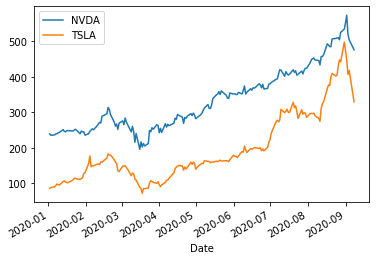

In [34]:
nvda_tsla.plot()

## Time Series

In [35]:
nvda2020.loc['2020-08-31']

High         5.430e+02
Low          5.215e+02
Open         5.273e+02
Close        5.350e+02
Volume       1.252e+07
Adj Close    5.348e+02
Name: 2020-08-31 00:00:00, dtype: float64

In [36]:
try:
    nvda2020.loc['2020-09-31']
except KeyError:
    pass

In [37]:
aug2020 = pd.Period('2020-08', freq='M')
aug2020

Period('2020-08', 'M')

In [38]:
# help(pd.Period)

## Shifting

In [39]:
nvda2020

              High     Low    Open   Close     Volume  Adj Close
Date                                                            
2020-01-02  239.91  236.72  238.75  239.91  5.938e+06    239.586
2020-01-03  237.83  234.10  235.10  236.07  5.135e+06    235.751
2020-01-06  237.27  231.27  232.32  237.06  6.566e+06    236.739
2020-01-07  241.77  236.39  238.20  239.93  7.871e+06    239.605
...            ...     ...     ...     ...        ...        ...
2020-09-02  589.07  556.00  588.15  573.86  2.185e+07    573.860
2020-09-03  555.38  515.15  553.15  520.62  2.363e+07    520.620
2020-09-04  527.00  468.19  511.35  504.90  3.659e+07    504.900
2020-09-08  502.00  468.17  469.38  476.52  1.985e+07    476.520

[173 rows x 6 columns]

In [40]:
nvda_shifted_1 = nvda2020.shift(1)

In [41]:
nvda_shifted_1

              High     Low    Open   Close     Volume  Adj Close
Date                                                            
2020-01-02     NaN     NaN     NaN     NaN        NaN        NaN
2020-01-03  239.91  236.72  238.75  239.91  5.938e+06    239.586
2020-01-06  237.83  234.10  235.10  236.07  5.135e+06    235.751
2020-01-07  237.27  231.27  232.32  237.06  6.566e+06    236.739
...            ...     ...     ...     ...        ...        ...
2020-09-02  559.75  537.46  539.20  552.84  1.281e+07    552.840
2020-09-03  589.07  556.00  588.15  573.86  2.185e+07    573.860
2020-09-04  555.38  515.15  553.15  520.62  2.363e+07    520.620
2020-09-08  527.00  468.19  511.35  504.90  3.659e+07    504.900

[173 rows x 6 columns]

## Daily Percentage Change

The daily percentage change provides a better measure of stock price changes over a single trading day. Daily percentage change is computed from daily adjusted closing price as follows:

$pct = \frac{Price_d - Price_{d-1}}{Price_{d-1}} = \frac{Price_d}{Price_{d-1}} - 1.0$


In [ ]:
# method 1
nvda2020_pct = nvda2020.iloc[1:] / nvda2020.iloc[:-1].values - 1
nvda2020_pct

In [ ]:
nvda2020_pct[['Adj Close']].plot()

In [ ]:
# method 2

nvda2020_pct = nvda2020 / nvda2020.shift(1) - 1
nvda2020_pct[['Adj Close']].plot()

In [ ]:
# method 3

nvda2020_pct = nvda2020.pct_change()
# nvda2020_pct.dropna()
nvda2020_pct.fillna(0, inplace=True) 
_ = nvda2020_pct[['Adj Close']].plot()

## Daily Cumulative Returns

$cumlative\_returns_{d} = cumlative\_returns_{d} \times (1+pct_{d})$

$cumlative\_returns_{d} = 1$

In [ ]:
nvda2020_cum_return = (nvda2020_pct + 1).cumprod()
_ = nvda2020_cum_return[['Adj Close']].plot()

In [ ]:
# Compare NVDA and TSLA
tsla2020_pct = tsla2020 / tsla2020.shift(1) - 1
tsla2020_cum_return = (tsla2020_pct + 1).cumprod()
_ = tsla2020_cum_return[['Adj Close']].plot()

In [ ]:
# Put TSLA and NVDA into the same figure

nvda_tsla_compare = pd.concat([nvda2020_cum_return[['Adj Close']], tsla2020_cum_return[['Adj Close']]], axis=1)
nvda_tsla_compare.columns=("NVDA", "TSLA")
nvda_tsla_compare.plot()

### Moving Average

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

In [ ]:
nvda2020_ma20 = nvda2020[['Adj Close']].rolling(20).mean()
nvda2020_ma50 = nvda2020[['Adj Close']].rolling(50).mean()
df = pd.concat([nvda2020[['Adj Close']], nvda2020_ma20, nvda2020_ma50], axis=1)
df.columns = ("Adj Close", "MA20", "MA60")
_ = df.plot()